# f

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [107]:
df = pd.read_csv('Afegan_Raw.csv', index_col = 0, delimiter = ';')
df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,,,,,,,,,,,,,,,,,
2014,59.9,271,64,0.01,7352358168,62,492,18.6,86,58,8.18,62,327582,17.5,17.5,0.476,10.0
2013,59.9,268,66,0.01,7321924272,64,430,18.1,89,62,8.13,64,31731688,17.7,17.7,0.470,9.9
2012,59.5,272,69,0.01,781842153,67,2787,17.6,93,67,8.52,67,3696958,17.9,18.0,0.463,9.8
2011,59.2,275,71,0.01,7097108703,68,3013,17.2,97,68,7.87,68,2978599,18.2,18.2,0.454,9.5
2010,58.8,279,74,0.01,7967936736,66,1989,16.7,102,66,9.20,66,2883167,18.4,18.4,0.448,9.2
2009,58.6,281,77,0.01,5676221682,63,2861,16.2,106,63,9.42,63,284331,18.6,18.7,0.434,8.9
2008,58.1,287,80,0.03,2587392536,64,1599,15.7,110,64,8.33,64,2729431,18.8,18.9,0.433,8.7
2007,57.5,295,82,0.02,1091015598,63,1141,15.2,113,63,6.73,63,26616792,19.0,19.1,0.415,8.4
2006,57.3,295,84,0.03,1717151751,64,1990,14.7,116,58,7.43,58,2589345,19.2,19.3,0.405,8.1


In [108]:
#AUTO-SCALING DOS DADOS
#1- Calculando a média de cada variável
dfm = df.mean()


#2- Calculando o desvio padrão de cada variável
dfdp = df.std()

#3- Escalando os dados / Normalizando os dados, deixando assim numa escala próxima
dfauto = (df-dfm)/dfdp
dfauto

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,,,,,,,,,,,,,,,,,
2014,1.354619,0.020364,-1.789967,-0.627896,1.410223,-1.344103,-0.837956,1.601259,-1.798195,0.362721,-0.113208,0.551570,-0.713928,0.163652,0.298303,1.345650,1.236943
2013,1.354619,-0.019479,-1.556493,-0.627896,1.399983,-0.282969,-0.864588,1.360106,-1.565670,0.576086,-0.185162,0.656299,2.067607,0.197746,0.327644,1.221180,1.172294
2012,1.103764,0.033645,-1.206282,-0.627896,-0.800513,1.308732,0.147849,1.118952,-1.255636,0.842793,0.376080,0.813391,-0.415494,0.231841,0.371656,1.075967,1.107645
2011,0.915622,0.073488,-0.972808,-0.627896,1.324341,1.839299,0.244927,0.926029,-0.945603,0.896134,-0.559323,0.865756,-0.479121,0.282982,0.400998,0.889263,0.913700
2010,0.664767,0.126612,-0.622597,-0.627896,1.617342,0.778165,-0.194928,0.684876,-0.558060,0.789452,1.354654,0.761027,-0.487574,0.317076,0.430339,0.764794,0.719754
2009,0.539339,0.153174,-0.272386,-0.627896,0.846265,-0.813536,0.179636,0.443722,-0.248027,0.629428,1.671252,0.603934,-0.717759,0.351170,0.474351,0.474366,0.525808
2008,0.225770,0.232860,0.077825,2.063086,-0.193012,-0.282969,-0.362450,0.202569,0.062007,0.682769,0.102654,0.656299,-0.501191,0.385264,0.503692,0.453621,0.396511
2007,-0.150513,0.339108,0.311299,0.717595,-0.696487,-0.813536,-0.559182,-0.038585,0.294532,0.629428,-2.199874,0.603934,1.614568,0.419359,0.533034,0.080213,0.202566
2006,-0.275941,0.339108,0.544772,2.063086,-0.485816,-0.282969,-0.194498,-0.279738,0.527057,0.362721,-1.192518,0.342113,-0.513598,0.453453,0.562375,-0.127235,0.008620


In [109]:
# TRANSFORMANDO EM ARRAY
X = np.asarray(dfauto.iloc[:,0:17])
np.diagonal(X)

array([ 1.35461902, -0.01947881, -1.20628178, -0.62789559,  1.61734202,
       -0.81353607, -0.36245009, -0.03858455,  0.52705713,  0.36272102,
        0.76463146, -0.54807923,  1.20387019, -2.46160092, -1.9022939 ])

In [110]:
pca = PCA(n_components=10)
pca.fit(X)
pca.components_

array([[-3.33579930e-01, -3.87532739e-02,  3.07731202e-01,
         1.43108762e-02, -2.61258059e-01, -9.43082355e-02,
         2.02946845e-01, -3.28539376e-01,  3.05311809e-01,
        -2.67179382e-01, -5.95735283e-02, -2.75858571e-01,
         5.03162724e-04, -2.03762809e-01, -2.42029444e-01,
        -3.32973785e-01, -3.32907723e-01],
       [-4.75869616e-03, -1.29217703e-01,  2.06554345e-01,
         4.02832888e-01, -1.49559433e-01,  2.55361545e-01,
        -4.53675948e-01, -9.70771033e-02,  2.05097446e-01,
        -9.84694564e-02, -4.32991750e-02, -9.90027739e-02,
         2.85298373e-01,  4.69765936e-01,  3.27274236e-01,
        -4.13947251e-02, -3.43951396e-02],
       [ 5.64798159e-02, -5.87022644e-01, -1.19619091e-01,
        -3.15691468e-01,  1.48386922e-01, -1.20108275e-01,
        -9.02989694e-02,  6.54530202e-02, -1.27509274e-01,
        -1.06562665e-01, -2.57612279e-01, -8.91617835e-02,
         5.31703347e-01,  8.15166257e-02, -3.10777504e-01,
        -3.66669419e-02, -1.2

In [111]:
pca.explained_variance_ratio_
np.round(pca.explained_variance_ratio_, 2)

array([0.52, 0.14, 0.1 , 0.09, 0.06, 0.04, 0.02, 0.02, 0.01, 0.  ])

In [112]:
pca.explained_variance_ratio_.cumsum()

array([0.51577523, 0.65632241, 0.75989929, 0.85217512, 0.90771717,
       0.94954793, 0.96838465, 0.98470061, 0.99676837, 0.99947305])

In [113]:
pca = PCA(n_components=4)
pca.fit(X)
pca.transform(X)

array([[-3.70737673e+00, -1.54282149e+00,  6.75060457e-01,
         2.16134443e-01],
       [-3.61786022e+00, -3.35461347e-01,  1.96296020e+00,
         1.79662789e-01],
       [-2.72132809e+00, -6.41437652e-01, -3.00781917e-01,
        -4.28849038e-01],
       [-2.87948778e+00, -6.81558008e-01,  2.90094397e-02,
        -3.78754093e-01],
       [-2.52295870e+00, -6.54209278e-01, -3.89014672e-01,
        -1.36186285e+00],
       [-1.56212924e+00, -9.57733696e-01, -6.36702308e-01,
        -9.01873880e-01],
       [-9.28220579e-01,  9.63857518e-01, -1.31199993e+00,
         1.26040009e+00],
       [-1.20573133e-01,  1.31980625e+00,  7.00779713e-01,
         2.65505189e+00],
       [ 3.33519323e-01,  1.36254734e+00, -1.20544778e+00,
         1.98016690e+00],
       [ 3.32761108e-01,  1.22120132e+00, -1.49585596e+00,
        -2.39928787e-01],
       [ 2.28285323e+00,  2.82100763e+00,  4.60558453e-02,
        -2.06338845e+00],
       [ 1.67118704e+00,  1.12433616e+00, -9.00406185e-01,
      

In [114]:
PCA1 = pca.transform(X)[:,0]
PCA2 = pca.transform(X)[:,1]
PCA3 = pca.transform(X)[:,2]
PCA4 = pca.transform(X)[:,3]
PCALL = pca.transform(X)

In [115]:
df['PCA1'] = PCA1
df['PCA2'] = PCA2
df['PCA3'] = PCA3
df['PCA4'] = PCA4
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,PCA1,PCA2,PCA3,PCA4
Year,,,,,,,,,,,,,,,,,,,,,
2014,59.9,271,64,0.01,7352358168,62,492,18.6,86,58,...,62,327582,17.5,17.5,0.476,10.0,-3.707377,-1.542821,0.675060,0.216134
2013,59.9,268,66,0.01,7321924272,64,430,18.1,89,62,...,64,31731688,17.7,17.7,0.470,9.9,-3.617860,-0.335461,1.962960,0.179663
2012,59.5,272,69,0.01,781842153,67,2787,17.6,93,67,...,67,3696958,17.9,18.0,0.463,9.8,-2.721328,-0.641438,-0.300782,-0.428849
2011,59.2,275,71,0.01,7097108703,68,3013,17.2,97,68,...,68,2978599,18.2,18.2,0.454,9.5,-2.879488,-0.681558,0.029009,-0.378754
2010,58.8,279,74,0.01,7967936736,66,1989,16.7,102,66,...,66,2883167,18.4,18.4,0.448,9.2,-2.522959,-0.654209,-0.389015,-1.361863


In [116]:
X = df.loc[:,['PCA1','PCA2']]

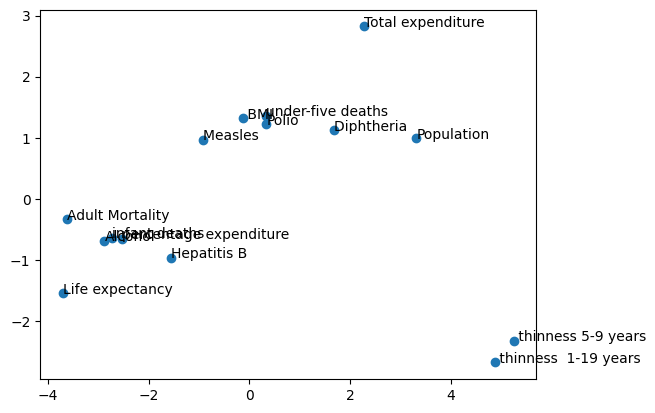

In [117]:
fig, ax = plt.subplots()
ax.scatter(X['PCA1'], X['PCA2'])
text = [ax.text(x, y, t) for x, y, t in
        zip(PCA1, PCA2, df.columns)]
plt.show()

In [118]:
valores_k = []
S = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i, n_init='auto').fit(X)
    valores_k.append(i)
    S.append(metrics.silhouette_score(X, kmeans.labels_))

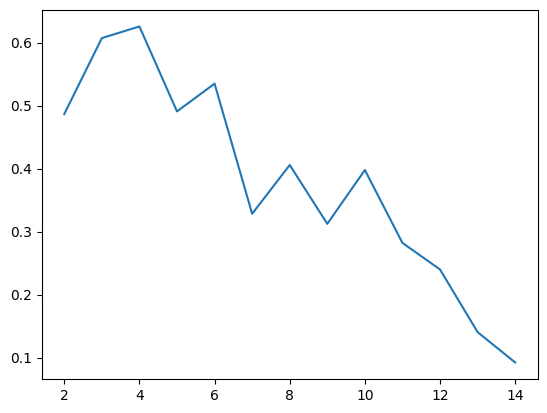

In [119]:
fig, ax = plt.subplots()
ax.plot(valores_k, S)
plt.show()

In [120]:
kmeans = KMeans(n_clusters=4, n_init='auto').fit(X)
kmeans.labels_
centroids = kmeans.cluster_centers_
metrics.silhouette_score(X, kmeans.labels_)

0.6255548703951249

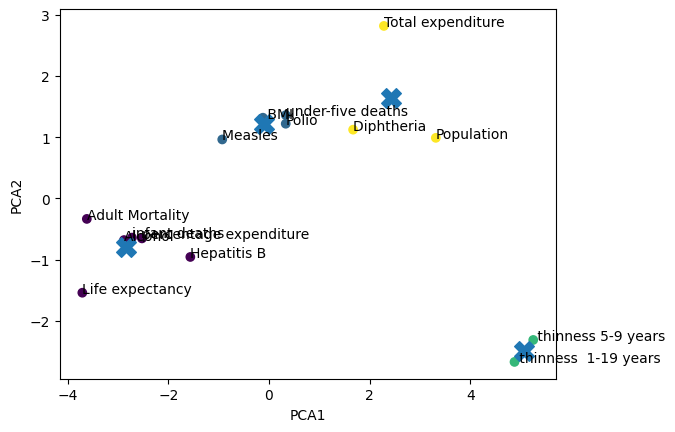

In [121]:
fig, ax = plt.subplots()
ax.scatter(X['PCA1'], X['PCA2'], c=kmeans.labels_)
ax.scatter(centroids[:,0], centroids[:,1], marker='X', s=200)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
text = [ax.text(x, y, t) for x, y, t in 
        zip(PCA1, PCA2, df.columns)]
plt.show()